In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import os

## Read in data from loops

directory_path = r'/Users/rprocious/Waterlevels_CBI/CBI-2/Corrected_Data_Official/nesscanResult_removedBadNesdisRecords/BobHall'
dataframes = []


for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('.csv'):

        file_path = os.path.join(directory_path, filename)
        
        df = pd.read_csv(
        file_path,
        parse_dates=[0],
        na_values=[-999, -99, 99, 'NA', 'RM'],
        engine='python'   
        )
        df.columns = ['station #','date', 'pwl',]
        dataframes.append(df)

bhp = pd.concat(dataframes, ignore_index=True)
bhp['date'] = pd.to_datetime(bhp['date'])

def third_diff(dataset):
    pwl = dataset['pwl']
    third_difference = pwl.shift(3) - 3*pwl.shift(2) + 3*pwl.shift(1) - pwl
    return third_difference.dropna().reset_index(drop=True)

values = third_diff(bhp)
values = round(values,4)
values = values.to_numpy()
nan_array = np.full(3, np.nan)
new_arr = np.concatenate((nan_array, values))
bhp.insert(3,'3D',new_arr)
bhp['Spike flag'] = 0
mean = bhp['3D'].mean()
std = bhp['3D'].std()

outliers = (bhp['3D'] < mean - 5*std) | (bhp['3D'] > mean + 5*std)

bhp.loc[outliers, 'Spike flag'] = 1
bhp['pwl_3D'] = bhp.loc[bhp['Spike flag']==0,'pwl']
bhp

,station #,date,pwl,3D,Spike flag,pwl_3D
0,014,1990-08-21 10:06:00,6.852,NaN,0,6.852
1,014,1990-08-21 10:12:00,6.837,NaN,0,6.837
2,014,1990-08-21 10:18:00,6.840,NaN,0,6.840
3,014,1990-08-21 10:24:00,6.843,0.018,0,6.843
4,014,1990-08-21 10:30:00,6.849,-0.003,0,6.849
...,...,...,...,...,...,...
2591312,014,2020-10-04 23:36:00,7.145,0.007,0,7.145
2591313,014,2020-10-04 23:42:00,7.127,0.011,0,7.127
2591314,014,2020-10-04 23:48:00,7.141,-0.048,0,7.141
2591315,014,2020-10-04 23:54:00,7.129,0.058,0,7.129


Text(0, 0.5, 'Freq')

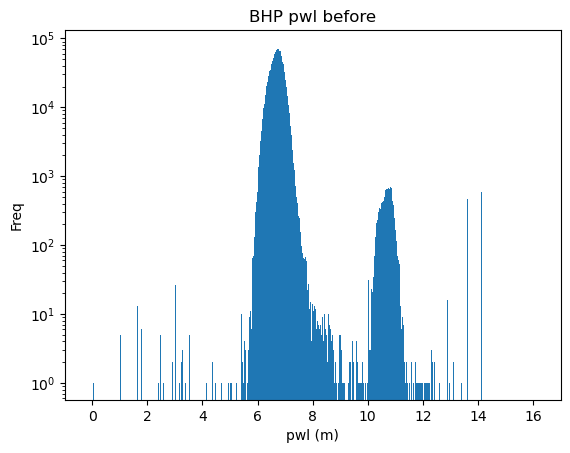

In [123]:
plt.hist(bhp['pwl'],1000)
plt.yscale('log')
plt.xlim(-1,17)
plt.title('BHP pwl before')
plt.xlabel('pwl (m)')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

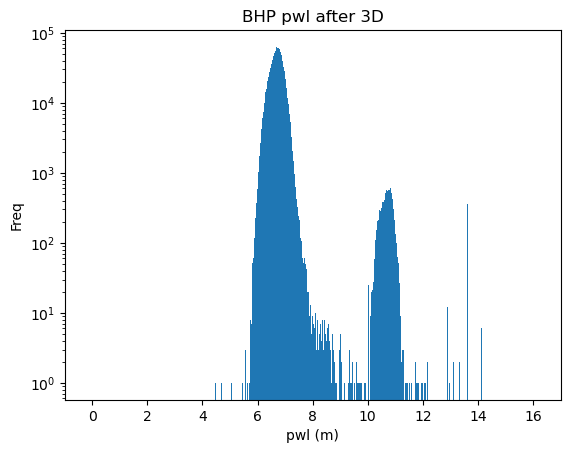

In [124]:
plt.hist(bhp['pwl_3D'],1000)
plt.yscale('log')
plt.xlim(-1,17)
plt.title('BHP pwl after 3D')
plt.xlabel('pwl (m)')
plt.ylabel('Freq')

In [125]:
bhp[26050:26080]

,station #,date,pwl,3D,Spike flag,pwl_3D
26050,014,1990-12-08 03:36:00,6.742,0.015,0,6.742
26051,014,1990-12-08 03:42:00,6.721,0.009,0,6.721
26052,014,1990-12-08 03:48:00,6.724,-0.042,0,6.724
26053,014,1990-12-08 03:54:00,6.715,0.036,0,6.715
26054,014,1990-12-08 04:00:00,6.709,-0.015,0,6.709
26055,014,1990-12-08 04:06:00,6.703,0.003,0,6.703
26056,014,1990-12-08 04:12:00,6.687,0.010,0,6.687
26057,014,1990-12-08 04:18:00,6.678,-0.017,0,6.678
26058,014,1990-12-08 04:24:00,6.687,-0.011,0,6.687
26059,014,1990-12-08 04:30:00,6.696,0.018,0,6.696


In [126]:
bhp[2205950:2208000]

,station #,date,pwl,3D,Spike flag,pwl_3D
2205950,014,2016-03-15 04:12:00,6.487,-0.044,0,6.487
2205951,014,2016-03-15 04:18:00,6.474,0.076,0,6.474
2205952,014,2016-03-15 04:24:00,6.467,-0.044,0,6.467
2205953,014,2016-03-15 04:30:00,6.470,-0.004,0,6.470
2205954,014,2016-03-15 04:36:00,6.442,0.041,0,6.442
...,...,...,...,...,...,...
2207995,014,2016-03-23 16:42:00,6.554,-0.038,0,6.554
2207996,014,2016-03-23 16:48:00,6.580,0.009,0,6.580
2207997,014,2016-03-23 16:54:00,6.586,0.034,0,6.586
2207998,014,2016-03-23 17:00:00,6.571,0.001,0,6.571


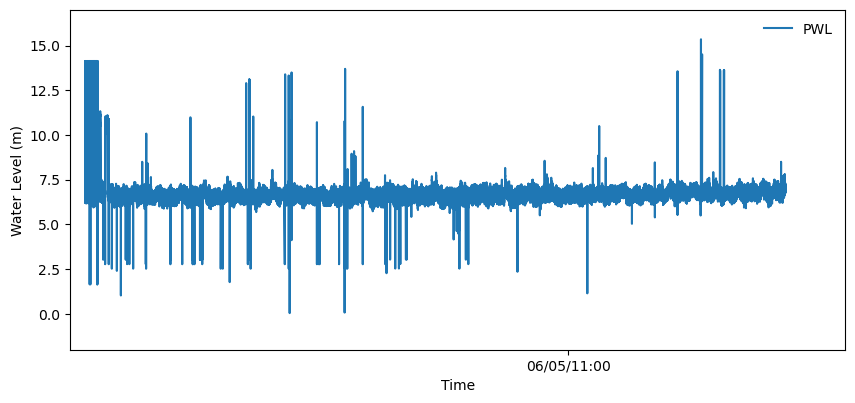

In [127]:
start_date = pd.to_datetime('1990/01/01 00:00')
end_date = pd.to_datetime('2023/04/30 03:30')

# Filter the data to only include the xlim range
filtered_data = bhp[(bhp['date'] >= start_date) & (bhp['date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10,5))
plt.plot(filtered_data['date'], filtered_data['pwl'], label='PWL')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H'))

# Set tick locator for hourly intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10000))
# Autofmt the x-axis labels
plt.gcf().autofmt_xdate()

plt.xticks(rotation=0)

for label in plt.gca().get_xticklabels():
    label.set_ha('center')  # Set horizontal alignment to center

# Adjust y-axis limits
plt.ylim(-2,17)

# Set x-axis limits
plt.xlim(start_date, end_date)

# Add legend and title
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Water Level (m)')

# Display the plot
plt.show()

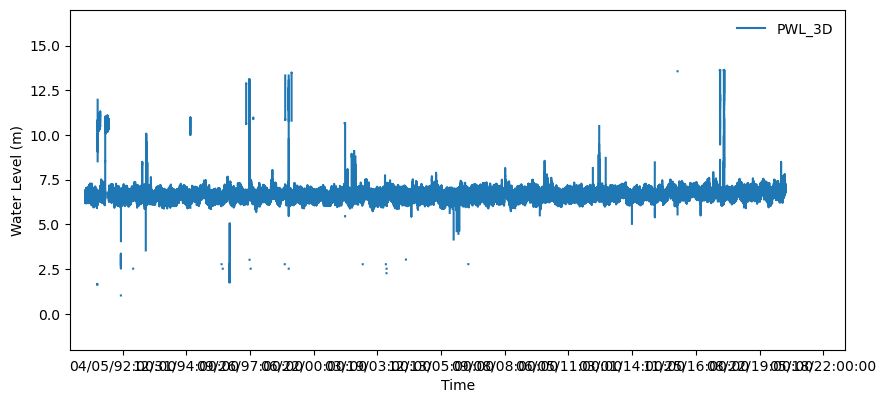

In [128]:
start_date = pd.to_datetime('1990/01/01 00:00')
end_date = pd.to_datetime('2023/04/30 03:30')

# Filter the data to only include the xlim range
filtered_data = bhp[(bhp['date'] >= start_date) & (bhp['date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10,5))
plt.plot(filtered_data['date'], filtered_data['pwl_3D'], label='PWL_3D')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))

# Set tick locator for hourly intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1000))
# Autofmt the x-axis labels
plt.gcf().autofmt_xdate()

plt.xticks(rotation=0)

for label in plt.gca().get_xticklabels():
    label.set_ha('center')  # Set horizontal alignment to center

# Adjust y-axis limits
plt.ylim(-2,17)

# Set x-axis limits
plt.xlim(start_date, end_date)

# Add legend and title
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Water Level (m)')

# Display the plot
plt.show()

(-2.0, 18.0)

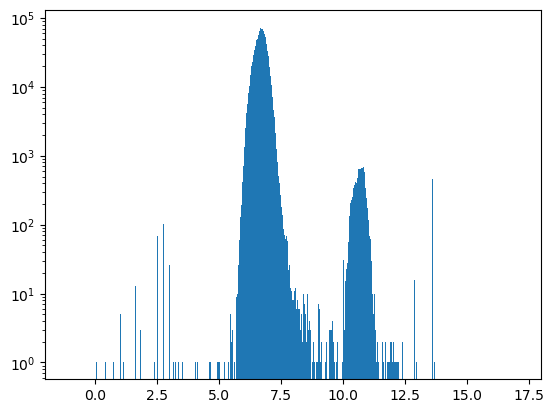

In [129]:
plt.hist(bhp['pwl'],1000)
plt.yscale('log')
plt.xlim(-2,18)

(-2.0, 18.0)

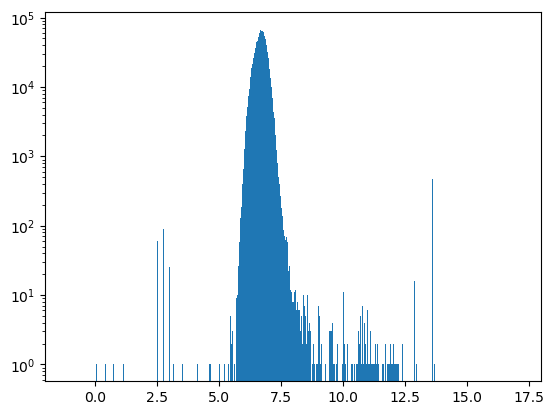

In [130]:
plt.hist(bhp['pwl'][206660:len(bhp)],1000)
plt.yscale('log')
plt.xlim(-2,18)

In [131]:

count = bhp['pwl'][(bhp['pwl'] >= 10) & (bhp['pwl'] <= 12)].count()
print(count)

23517


In [132]:
bhp[200000:206670]

,station #,date,pwl,3D,Spike flag,pwl_3D
200000,014,1992-12-04 01:42:00,6.722,0.001,0,6.722
200001,014,1992-12-04 01:48:00,6.693,0.049,0,6.693
200002,014,1992-12-04 01:54:00,6.715,-0.091,0,6.715
200003,014,1992-12-04 02:00:00,6.704,0.084,0,6.704
200004,014,1992-12-04 02:06:00,6.714,-0.054,0,6.714
...,...,...,...,...,...,...
206665,014,1993-01-02 17:12:00,6.792,-0.287,0,6.792
206666,014,1993-01-02 17:18:00,6.797,0.013,0,6.797
206667,014,1993-01-02 17:24:00,6.801,0.004,0,6.801
206668,014,1993-01-02 17:30:00,6.786,0.018,0,6.786


In [137]:
import numpy as np
import pandas as pd

def third_diff_chop_and_replace(df, initial_std_factor=7, diff_threshold=10):
    """
    Process the DataFrame by:
      1. Replacing any 'pwl' value that is more than initial_std_factor standard deviations
         away from the median with NaN.
      2. Iteratively computing the third difference (3D) for each row starting at index 3:
         
             3D[i] = pwl[i-3] - 3*pwl[i-2] + 3*pwl[i-1] - pwl[i]
         
         and if the absolute third difference exceeds diff_threshold,
         replacing the current 'pwl' value with NaN so that future calculations use the updated value.
         
    Parameters:
      df               : DataFrame with a 'pwl' column.
      initial_std_factor: Factor (default 7) used for initial outlier removal.
      diff_threshold   : Threshold (default 10) for the third difference; if exceeded, the value is replaced with NaN.
      
    Returns:
      A copy of the DataFrame with:
         - 'pwl' updated (with spikes replaced by NaN),
         - A new '3D' column with the calculated third difference values.
    """
    # Work on a copy so the original DataFrame is not modified.
    df = df.copy()
    
    # 1. Initial outlier removal based on median and std:
    median_val = df['pwl'].median()
    std_val = df['pwl'].std()
    outlier_mask = np.abs(df['pwl'] - median_val) > initial_std_factor * std_val
    df.loc[outlier_mask, 'pwl'] = np.nan
    
    # Create a new column for third differences.
    df['3D'] = np.nan
    
    # 2. Iteratively compute third difference.
    # Loop starts at index 3 because we need three previous values.
    for i in range(3, len(df)):
        # Retrieve the three previous values.
        v1 = df.loc[i-3, 'pwl']
        v2 = df.loc[i-2, 'pwl']
        v3 = df.loc[i-1, 'pwl']
        curr_val = df.loc[i, 'pwl']
        
        # If any value is NaN, the computed diff will be NaN.
        if pd.notna(v1) and pd.notna(v2) and pd.notna(v3) and pd.notna(curr_val):
            diff = v1 - 3*v2 + 3*v3 - curr_val
        else:
            diff = np.nan
        
        # Save the computed third difference.
        df.loc[i, '3D'] = diff
        
        # If the diff is valid and exceeds the threshold, replace the current value with NaN.
        if pd.notna(diff) and np.abs(diff) > diff_threshold:
            df.loc[i, 'pwl'] = np.nan
    
    return df

# Example usage:
# Assuming you have a DataFrame `bhp` with a column 'pwl':
# result = third_diff_chop_and_replace(bhp)
# print(result)


In [138]:
df_2 = third_diff_chop_and_replace(bhp)

In [139]:
df_2

,station #,date,pwl,3D,Spike flag,pwl_3D
0,014,1990-08-21 10:06:00,6.852,NaN,0,6.852
1,014,1990-08-21 10:12:00,6.837,NaN,0,6.837
2,014,1990-08-21 10:18:00,6.840,NaN,0,6.840
3,014,1990-08-21 10:24:00,6.843,0.018,0,6.843
4,014,1990-08-21 10:30:00,6.849,-0.003,0,6.849
...,...,...,...,...,...,...
2591312,014,2020-10-04 23:36:00,7.145,0.007,0,7.145
2591313,014,2020-10-04 23:42:00,7.127,0.011,0,7.127
2591314,014,2020-10-04 23:48:00,7.141,-0.048,0,7.141
2591315,014,2020-10-04 23:54:00,7.129,0.058,0,7.129


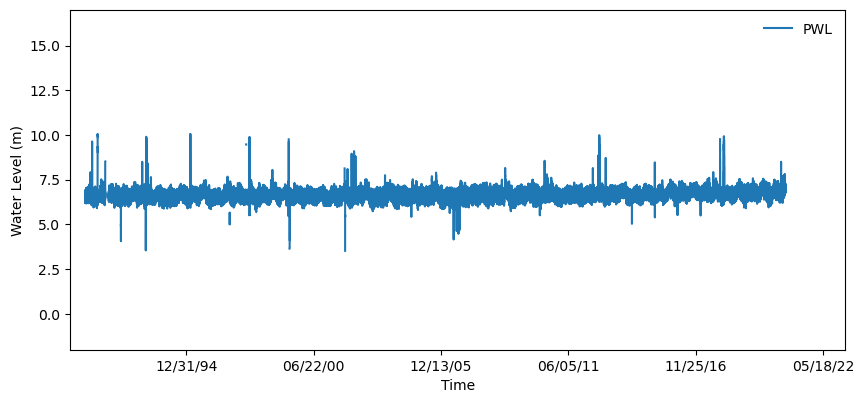

In [140]:
start_date = pd.to_datetime('1990/01/01 00:00')
end_date = pd.to_datetime('2023/04/30 03:30')

# Filter the data to only include the xlim range
filtered_data = df_2[(df_2['date'] >= start_date) & (df_2['date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10,5))
plt.plot(filtered_data['date'], filtered_data['pwl'], label='PWL')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))

# Set tick locator for hourly intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2000))
# Autofmt the x-axis labels
plt.gcf().autofmt_xdate()

plt.xticks(rotation=0)

for label in plt.gca().get_xticklabels():
    label.set_ha('center')  # Set horizontal alignment to center

# Adjust y-axis limits
plt.ylim(-2,17)

# Set x-axis limits
plt.xlim(start_date, end_date)

# Add legend and title
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Water Level (m)')

# Display the plot
plt.show()

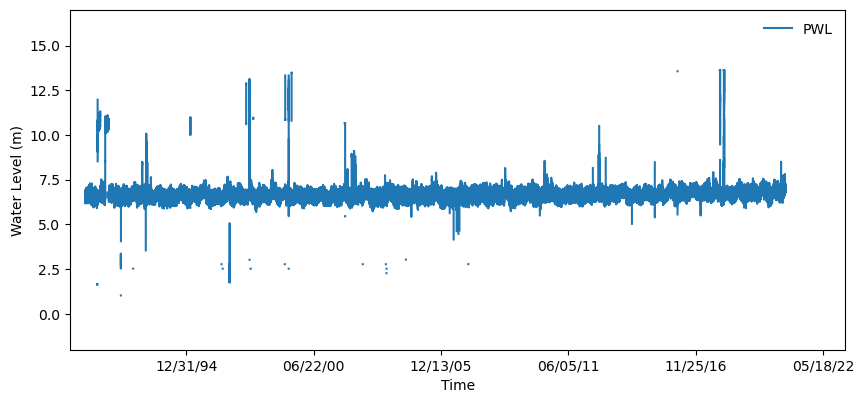

In [141]:
start_date = pd.to_datetime('1990/01/01 00:00')
end_date = pd.to_datetime('2023/04/30 03:30')

# Filter the data to only include the xlim range
filtered_data = df_2[(df_2['date'] >= start_date) & (df_2['date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10,5))
plt.plot(filtered_data['date'], filtered_data['pwl_3D'], label='PWL')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))

# Set tick locator for hourly intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2000))
# Autofmt the x-axis labels
plt.gcf().autofmt_xdate()

plt.xticks(rotation=0)

for label in plt.gca().get_xticklabels():
    label.set_ha('center')  # Set horizontal alignment to center

# Adjust y-axis limits
plt.ylim(-2,17)

# Set x-axis limits
plt.xlim(start_date, end_date)

# Add legend and title
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Water Level (m)')

# Display the plot
plt.show()